In [11]:
import pandas as pd
import numpy as np
import os
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
cwd = os.getcwd()
cwd

'C:\\Python\\internship'

In [13]:
feature_dir = os.path.join(cwd,'Crystal_Features_Selected/')  #join路径和文件夹（此文件夹为选出来的特征文件夹）
feature_dir

'C:\\Python\\internship\\Crystal_Features_Selected/'

# Read RFE files

In [14]:
features_files = os.listdir(feature_dir)  #利用os.listdir()获得文件夹中的文件名
features_files

['df_CFTE_selRFE',
 'df_CFTR_selRFE',
 'df_CRTE_selRFE',
 'df_CRTR_selRFE',
 'df_MCTE_selRFE',
 'df_MCTR_selRFE',
 'df_MFTE_selRFE',
 'df_MFTR_selRFE',
 'df_PFTE_selRFE',
 'df_PFTR_selRFE']

In [15]:
TE = []
TR = []
for f in features_files:
    if f[5:7] == 'TE':
        TE.append(f)
    else:
        TR.append(f)
print(TE,TR)

['df_CFTE_selRFE', 'df_CRTE_selRFE', 'df_MCTE_selRFE', 'df_MFTE_selRFE', 'df_PFTE_selRFE'] ['df_CFTR_selRFE', 'df_CRTR_selRFE', 'df_MCTR_selRFE', 'df_MFTR_selRFE', 'df_PFTR_selRFE']


# Read label files

In [16]:
label_dir = os.path.join(cwd,'Crystal_y_label_Csv/')
label_dir

'C:\\Python\\internship\\Crystal_y_label_Csv/'

In [17]:
label_files = os.listdir(label_dir)
label_files

['df_CF_TE_Label',
 'df_CF_TR_Label',
 'df_CR_TE_label',
 'df_CR_TR_Label',
 'df_MC_TE_Label',
 'df_MC_TR_Label',
 'df_MF_TE_Label',
 'df_MF_TR_Label',
 'df_PF_TE_Label',
 'df_PF_TR_Label']

In [18]:
te = []
tr = []
for y in label_files:
    if y[6:8] == 'TE':
        te.append(y)
    else:
        tr.append(y)
print(te,tr)

['df_CF_TE_Label', 'df_CR_TE_label', 'df_MC_TE_Label', 'df_MF_TE_Label', 'df_PF_TE_Label'] ['df_CF_TR_Label', 'df_CR_TR_Label', 'df_MC_TR_Label', 'df_MF_TR_Label', 'df_PF_TR_Label']


In [19]:
Y = pd.read_csv(label_dir+tr[0])
Y = Y.iloc[:,2]

In [20]:
y = pd.read_csv(label_dir+te[0])
y = y.iloc[:,2]

# Reduction dimension by using PCA

## CF Dataset

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [22]:
df_X = pd.read_csv(feature_dir+TR[0])
df_X = df_X.iloc[:,1:]
df_X.head()

,AAC_E,AAC_M,AAC_N,AAC_W,AAC_Y,APAAC_Pc1.A,APAAC_Pc1.R,APAAC_Pc1.C,APAAC_Pc1.G,APAAC_Pc1.H,...,QSOrder_Schneider.Xd.27,QSOrder_Schneider.Xd.28,QSOrder_Grantham.Xd.4,QSOrder_Grantham.Xd.5,QSOrder_Grantham.Xd.7,QSOrder_Grantham.Xd.10,QSOrder_Grantham.Xd.23,QSOrder_Grantham.Xd.24,QSOrder_Grantham.Xd.29,QSOrder_Grantham.Xd.30
0,0.075949,0.069620,0.037975,0.000000,0.025316,11.561583,2.890396,1.926930,11.561583,3.853861,...,0.028942,0.033679,0.034080,0.035378,0.039857,0.036980,0.032772,0.032417,0.030037,0.029594
1,0.102151,0.026882,0.021505,0.000000,0.032258,10.047024,16.440584,0.000000,10.960389,4.566829,...,0.030136,0.028091,0.037485,0.037443,0.037370,0.034131,0.032169,0.030400,0.030660,0.032344
2,0.067729,0.025896,0.049801,0.007968,0.039841,37.180149,20.973417,5.720023,40.993497,6.673360,...,0.032150,0.032450,0.034725,0.037094,0.034971,0.031988,0.032322,0.031103,0.034296,0.032059
3,0.061303,0.030651,0.042146,0.019157,0.015326,44.899307,11.712863,1.952144,21.473582,6.832503,...,0.033193,0.029773,0.036532,0.034556,0.033680,0.034746,0.032307,0.031945,0.029459,0.031425
4,0.040650,0.024390,0.048780,0.016260,0.008130,50.454589,0.951973,0.951973,18.087494,2.855920,...,0.034967,0.033889,0.028962,0.035762,0.028811,0.033718,0.033589,0.036047,0.031615,0.030699


In [23]:
scaler = StandardScaler()
df_S = scaler.fit_transform(df_X)

In [24]:
model_pca = PCA(n_components=100)
X = model_pca.fit_transform(df_S)
X.shape

(2184, 100)

In [25]:
df_x = pd.read_csv(feature_dir+TE[0])
df_x = df_x.iloc[:,1:]
df_x.head()

,AAC_E,AAC_M,AAC_N,AAC_W,AAC_Y,APAAC_Pc1.A,APAAC_Pc1.R,APAAC_Pc1.C,APAAC_Pc1.G,APAAC_Pc1.H,...,QSOrder_Schneider.Xd.27,QSOrder_Schneider.Xd.28,QSOrder_Grantham.Xd.4,QSOrder_Grantham.Xd.5,QSOrder_Grantham.Xd.7,QSOrder_Grantham.Xd.10,QSOrder_Grantham.Xd.23,QSOrder_Grantham.Xd.24,QSOrder_Grantham.Xd.29,QSOrder_Grantham.Xd.30
0,0.073826,0.026846,0.020134,0.006711,0.046980,9.668838,11.602606,2.900651,7.735071,2.900651,...,0.029255,0.027886,0.034903,0.040215,0.035869,0.033418,0.029084,0.033031,0.026172,0.030052
1,0.087805,0.024390,0.058537,0.004878,0.029268,11.720839,20.736869,2.704809,4.508015,3.606412,...,0.029923,0.030041,0.035124,0.037572,0.039731,0.033460,0.030841,0.031635,0.028907,0.028552
2,0.074766,0.014019,0.028037,0.014019,0.028037,46.361539,13.522116,5.795192,33.805289,7.726923,...,0.034215,0.032661,0.035428,0.034339,0.033862,0.033751,0.032269,0.032535,0.031283,0.031961
3,0.079800,0.024938,0.027431,0.014963,0.037406,40.775175,14.223898,4.741299,31.292576,4.741299,...,0.033215,0.030404,0.034010,0.033544,0.033737,0.034882,0.034349,0.032010,0.032283,0.031141
4,0.066514,0.027523,0.068807,0.016055,0.045872,28.072215,8.020633,1.002579,27.069636,2.005158,...,0.031298,0.033493,0.033387,0.036489,0.032307,0.034226,0.031678,0.033558,0.033711,0.033603


In [26]:
scaler = StandardScaler()
df_s = scaler.fit_transform(df_x)

In [35]:
model_pca = PCA(n_components=275)
x = model_pca.fit_transform(df_s)
x.shape

(546, 275)

In [36]:
print(model_pca.explained_variance_ratio_) 
print(len(model_pca.explained_variance_ratio_))
print(model_pca.explained_variance_)

[1.00561842e-01 5.20425125e-02 4.30467707e-02 3.67939070e-02
 3.17586950e-02 2.64228479e-02 2.28909180e-02 1.88235891e-02
 1.83347579e-02 1.70491544e-02 1.67188088e-02 1.61199910e-02
 1.42531952e-02 1.33097074e-02 1.29703523e-02 1.23520054e-02
 1.18731143e-02 1.16303900e-02 1.11581909e-02 1.07088960e-02
 1.02407370e-02 9.84342936e-03 9.60558846e-03 9.15143696e-03
 9.12641404e-03 8.92563275e-03 8.90798228e-03 8.36829862e-03
 8.06262118e-03 7.99543979e-03 7.76623718e-03 7.52890655e-03
 7.38072240e-03 7.06140556e-03 6.82659411e-03 6.63917985e-03
 6.59961575e-03 6.38937986e-03 6.32366778e-03 6.16590031e-03
 5.95681196e-03 5.91833756e-03 5.81831335e-03 5.75543955e-03
 5.52229942e-03 5.45399050e-03 5.29715596e-03 5.26471831e-03
 5.19799305e-03 5.05304093e-03 4.92932525e-03 4.88646887e-03
 4.70417056e-03 4.66071222e-03 4.61047224e-03 4.56181252e-03
 4.49427426e-03 4.40907440e-03 4.35710240e-03 4.26598279e-03
 4.18004576e-03 4.12719705e-03 4.09172359e-03 4.01043710e-03
 3.87837487e-03 3.806047

Text(0, 0.5, 'cumulative explained variance')

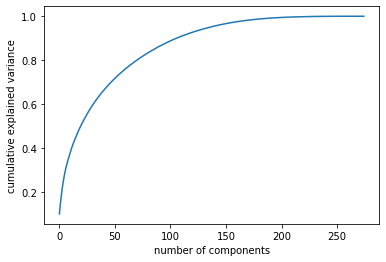

In [37]:
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Prediction by using pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report,confusion_matrix
from deepforest import CascadeForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [39]:
# DCF model prediction
pipeline_cf = Pipeline([('pca1',PCA(n_components=275)),
                     ('cf_classifier',CascadeForestClassifier(random_state=1))])
model_1 = pipeline_cf.fit(df_X, Y)
acc_1 = model_1.score(df_x,y)
y_pred1 = model_1.predict(df_x)
mcc_1 = matthews_corrcoef(y,y_pred1)
print(classification_report(y,y_pred1))
print(acc_1,mcc_1)

[2022-04-23 09:13:43.216] Start to fit the model:
[2022-04-23 09:13:43.216] Fitting cascade layer = 0 
[2022-04-23 09:13:46.917] layer = 0  | Val Acc = 72.619 % | Elapsed = 3.701 s
[2022-04-23 09:13:46.923] Fitting cascade layer = 1 
[2022-04-23 09:13:50.324] layer = 1  | Val Acc = 74.176 % | Elapsed = 3.401 s
[2022-04-23 09:13:50.329] Fitting cascade layer = 2 
[2022-04-23 09:13:53.662] layer = 2  | Val Acc = 74.725 % | Elapsed = 3.333 s
[2022-04-23 09:13:53.667] Fitting cascade layer = 3 
[2022-04-23 09:13:57.014] layer = 3  | Val Acc = 74.588 % | Elapsed = 3.347 s
[2022-04-23 09:13:57.014] Early stopping counter: 1 out of 2
[2022-04-23 09:13:57.019] Fitting cascade layer = 4 
[2022-04-23 09:14:00.330] layer = 4  | Val Acc = 74.954 % | Elapsed = 3.311 s
[2022-04-23 09:14:00.334] Fitting cascade layer = 5 
[2022-04-23 09:14:03.672] layer = 5  | Val Acc = 74.634 % | Elapsed = 3.339 s
[2022-04-23 09:14:03.672] Early stopping counter: 1 out of 2
[2022-04-23 09:14:03.677] Fitting cascade 

In [42]:
# SVM prediction
pipeline_svc = Pipeline([('pca1',PCA(n_components=275)),
                     ("svc", SVC(gamma="auto"))])
model_2 = pipeline_svc.fit(df_X, Y)
acc_2 = model_2.score(df_x,y)
y_pred2 = model_2.predict(df_x)
mcc_2 = matthews_corrcoef(y,y_pred2)
print(classification_report(y,y_pred2))
print(acc_2,mcc_2)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       143
           1       0.74      1.00      0.85       403

    accuracy                           0.74       546
   macro avg       0.37      0.50      0.42       546
weighted avg       0.54      0.74      0.63       546

0.7380952380952381 0.0


In [43]:
# XGBoost prediction
pipeline_xgb = Pipeline([('pca1',PCA(n_components=275)),
                     ("xgb", xgb.XGBClassifier())])
model_3 = pipeline_xgb.fit(df_X, Y)
acc_3 = model_3.score(df_x,y)
y_pred3 = model_3.predict(df_x)
mcc_3 = matthews_corrcoef(y,y_pred3)
print(classification_report(y,y_pred3))
print(acc_3,mcc_3)

[17:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.54      0.09      0.16       143
           1       0.75      0.97      0.85       403

    accuracy                           0.74       546
   macro avg       0.65      0.53      0.50       546
weighted avg       0.70      0.74      0.67       546

0.7417582417582418 0.13643664970409838
